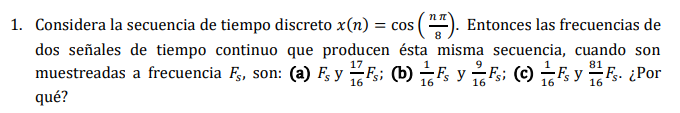

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from Correlación_parcial import lcorr
from Reconstrucciondeseñalesapartirdemuestras import h

importing Jupyter notebook from Correlación_parcial.ipynb


In [16]:
# c) Las señales muestreadas son:
n1=np.arange(64)
x1=np.cos(2*np.pi*1/16*n1)
X2=np.cos(2*np.pi*81/16*n1)
x3=np.cos(np.pi*1/8*n1)

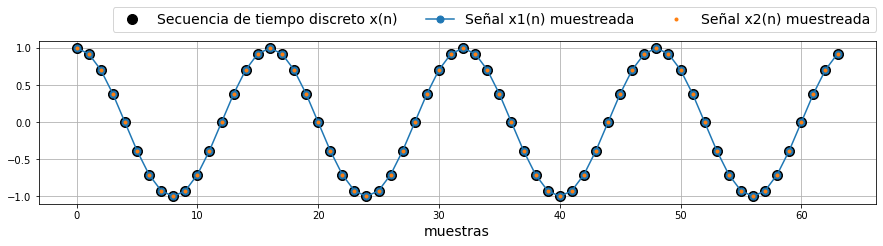

In [26]:
plt.figure(figsize=(15,3))
plt.plot(n1,x3,'ok',ms=10)
plt.plot(n1,x1,'o-',ms=7)
plt.plot(n1,X2,'o',ms=3)
plt.grid()
plt.xlabel('muestras', fontsize=14)
plt.legend(('Secuencia de tiempo discreto x(n)','Señal x1(n) muestreada','Señal x2(n) muestreada',),prop={'size':14},ncol=3,bbox_to_anchor=(0.08,1.01))
plt.show()

La señal continua de frecuencia (1/16)*Fs, corresponde con la secuencia discreta dada:
x3=np.cos(np.pi*1/8*n1)=np.cos(2*np.pi*1/16*n1)

La segunda señal continua de frecuencia (81/16)*Fs
A la cual le calculo la Frecuencia relativa y obtengo: fr=(81/16)*Fs/Fs=81/16 >1/2 No se cumple el teorema del muestreo
y la señal discreta obtenida es un alias de la frecuencia (1/16)*Fs. Por eso producen las mismas muestras como se observa en la imagen.


### 2)

La información contenida en el archivo “patron.txt” representa un patrón que se trata de
buscar dentro de otra señal, almacenada en el archivo “señal.txt”. Sabiendo que tanto el
patrón como la señal fueron muestreados a 100 Hz, determina la ubicación del patrón
dentro de la señal. 


In [29]:
Fs2=100
señal2=np.loadtxt('señal.txt')
patron=np.loadtxt('patron.txt')

In [30]:
N2=4000 #Muestras

In [31]:
n2= np.arange(len(señal2))
t2 = n2/Fs2

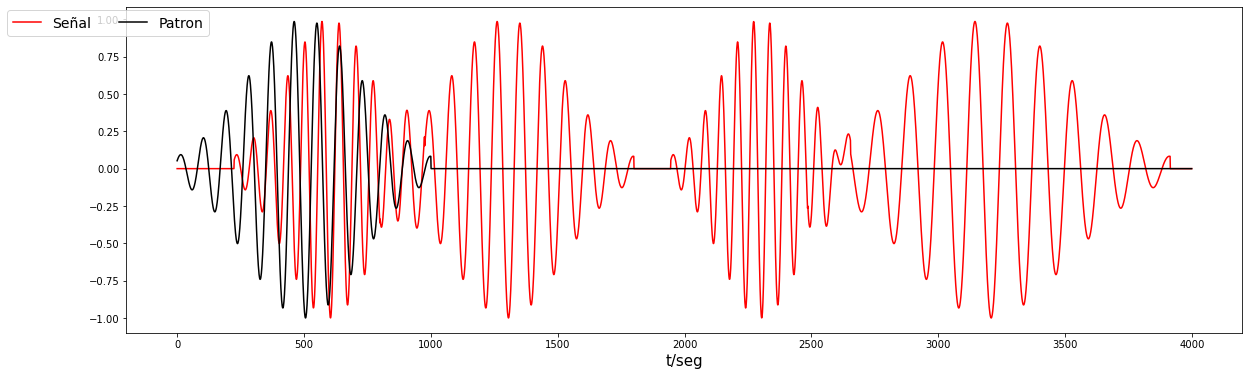

In [32]:
plt.figure(figsize=(20,6))
plt.plot(n2, señal2, 'r')
plt.plot(n2, patron, 'k')
plt.legend(('Señal','Patron'),prop={'size':14},ncol=3,bbox_to_anchor=(0.08,1.01))
plt.xlabel('t/seg', fontsize=15)
#plt.ylabel('EMG', fontsize=15)

plt.show()

In [36]:
r2=lcorr(patron,señal2)

In [37]:
np.where(r2[:,1] == np.max(r2[:,1])) #Encuentre donde esta el maximo de amplitud de la correlación parcial

(array([800], dtype=int64),)

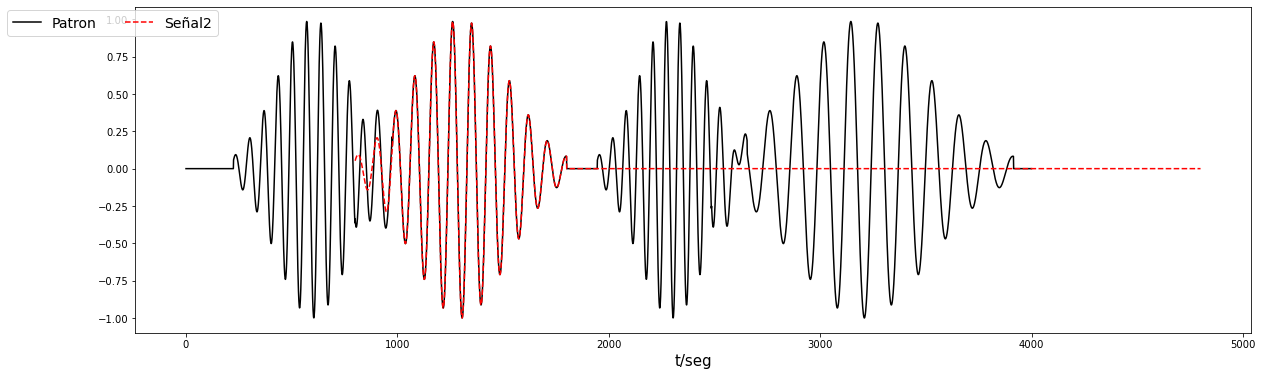

array([   0,    1,    2, ..., 3997, 3998, 3999])

In [38]:
plt.figure(figsize=(20,6))
plt.plot(n2, señal2, 'k')
plt.plot(n2+800, patron, 'r--')
plt.legend(('Patron','Señal2'),prop={'size':14},ncol=3,bbox_to_anchor=(0.08,1.01))
plt.xlabel('t/seg', fontsize=15)
plt.show()
n2

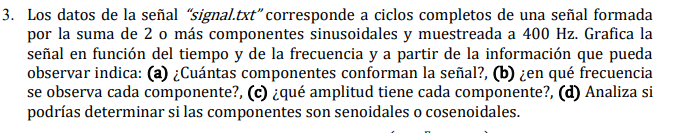

In [39]:
señal3=np.loadtxt('signal.txt')

In [41]:
Fs3=400
t3=np.arange(len(señal3))/Fs3

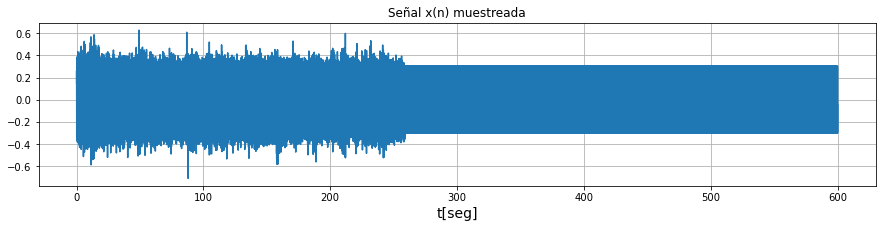

In [45]:
plt.figure(figsize=(15,3))
plt.plot(t3,señal3)
plt.grid()
plt.xlabel('t[seg]', fontsize=14)
plt.title('Señal x(n) muestreada')
plt.show()

In [46]:
from scipy.fftpack import fft, fftfreq, ifft

In [54]:
Espec3=fft(señal3)/len(señal3)
p3=np.arange(len(señal3))

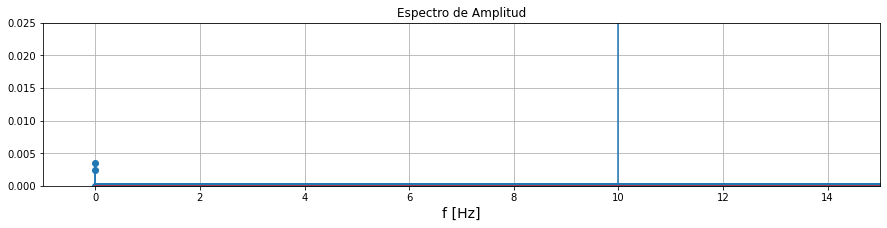

In [74]:
plt.figure(figsize=(15,3))
plt.stem(p3*Fs3/len(señal3),abs(Espec3))
plt.grid()
plt.xlabel('f [Hz]', fontsize=14)
plt.title('Espectro de Amplitud')
plt.xlim(-1,15)
plt.ylim(0,0.025)
plt.show()

In [66]:
for i in p3:
    if (abs(Espec3.real[i])<0.001):
        Espec3.real[i]=0
    if (abs(Espec3.imag[i])<0.001):
        Espec3.imag[i]=0

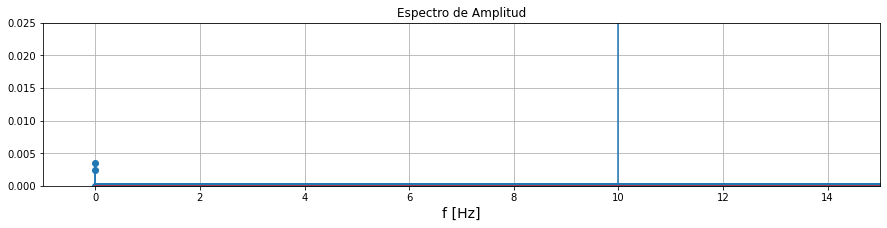

In [75]:
plt.figure(figsize=(15,3))
plt.stem(p3*Fs3/len(señal3),abs(Espec3))
plt.grid()
plt.xlabel('f [Hz]', fontsize=14)
plt.title('Espectro de Amplitud')
plt.xlim(-1,15)
plt.ylim(0,0.025)
plt.show()

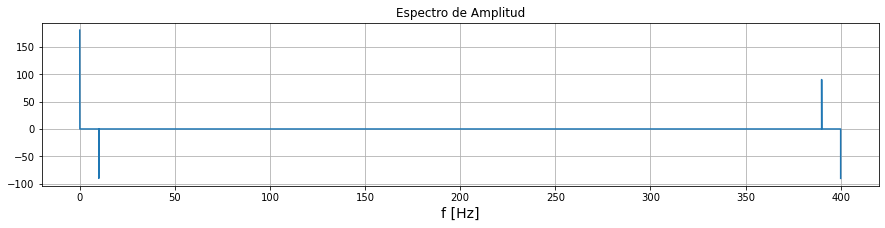

In [67]:
plt.figure(figsize=(15,3))
plt.plot(p3*(Fs3/len(señal3)),np.angle(Espec3)*180/np.pi)
plt.grid()
plt.xlabel('f [Hz]', fontsize=14)
plt.title('Espectro de Amplitud')
plt.show()

    a) Se encuentra un armonicos en el intervalo [0,Fs/2]
    b) El armonicos tienen frecuencias: f1=10 Hz.
    c) La amplitudes del armonicos es: A2=0.15
    d) Segun el diagrama de fase. La componente de 10Hz corresponde a una funcion seno con desfasaje 0 o a una función coseno con desfasaje de -90°.

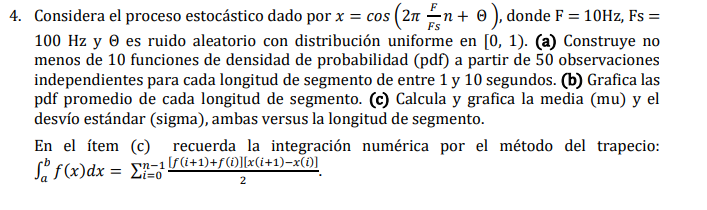

In [104]:
F4=10
Fs4=100
me=0
dest=1
n4=np.arange(0,50001)
t4=n4/Fs4
N=len(t4)
seg=np.array([100,500,1000]) #Poner un muestras
noise=noise3=np.random.normal(me,dest, N)
x4=np.cos(np.pi*2*F4/Fs4*n4+noise)

In [105]:
x4_norm = (x4 - np.mean(x4))/np.std(x4)

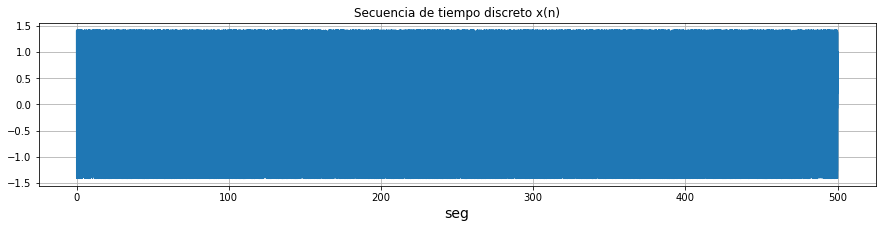

In [106]:
plt.figure(figsize=(15,3))
plt.plot(t4,x4_norm,ms=10)
plt.grid()
plt.xlabel('seg', fontsize=14)
plt.title('Secuencia de tiempo discreto x(n)')
plt.show()

In [95]:
import import_ipynb
from Estimaciondeunafdp_new1 import pdf_new1
from scipy.fftpack import fft, fftfreq, ifft
from scipy.stats import norm, cauchy, gamma, logistic
from fitter import Fitter
import datetime
from Overlapping_Index import area
from Sum_of_square_error_SSE import sse
from scipy.stats import wasserstein_distance
from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1 import cdf
from Area_bajo_la_curva_ROC import AUC
from Factorial import factorial

importing Jupyter notebook from Estimaciondeunafdp_new1.ipynb
importing Jupyter notebook from Overlapping_Index.ipynb
importing Jupyter notebook from Sum_of_square_error_SSE.ipynb
importing Jupyter notebook from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1.ipynb
importing Jupyter notebook from Area_bajo_la_curva_ROC.ipynb
importing Jupyter notebook from Factorial.ipynb


In [107]:
nseg=len(seg)
len(x4_norm)// 1000

50

In [126]:
tini = datetime.datetime.now()
bigp = np.empty(0); bigY = np.empty(0,dtype=float); dat = x4_norm; Ndat = len(dat)
x0, xf, Np = -1.5, 1.5, 24000; d = (xf-x0)/Np; x = x0 + d*np.arange(Np)
for i in np.arange(nseg): #este lazo recorre las diferentes longitudes de seg
    datos = np.empty((int(seg[i]),0)) # genero una matriz donde guardaré los datos
    m = Ndat//seg[i]
    aux = np.reshape(dat[0:seg[i]*m],(int(seg[i]),int(m)),order= 'F')
    datos = np.append(datos, aux, axis=1) #datos para cada longitud de seg
    mi = np.random.choice(int(m),50,replace=False)
    datos = datos[:,mi]
    r = np.random.choice(seg[i],10,replace=False) #elijo las 10 filas aleatoriamente
    p = datos[r,:]
    bigp = np.append(bigp, p)
    y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1)
    y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1)
    y5 = pdf_new1(p[4,:],x0,xf,Np,1); y6 = pdf_new1(p[5,:],x0,xf,Np,1)
    y7 = pdf_new1(p[6,:],x0,xf,Np,1); y8 = pdf_new1(p[7,:],x0,xf,Np,1)
    y9 = pdf_new1(p[8,:],x0,xf,Np,1); y10 = pdf_new1(p[9,:],x0,xf,Np,1)
    Y = np.hstack((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10))
    bigY = np.append(bigY, Y)
tend =datetime.datetime.now()    

In [127]:
p.shape

(10, 50)

In [128]:
bigY.shape, 24000*10*3

((720000,), 720000)

In [129]:
Y1 = np.reshape(bigY,(Np, 10 * nseg), order='F')

In [130]:
Y1.shape

(24000, 30)

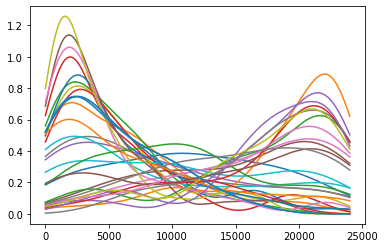

In [131]:
plt.plot(Y1)
plt.plot(y10)
plt.show()

In [132]:
Area = np.empty(0)
for k in np.arange(0,30,10):
    for i in range(0,10):
        for j in range(i+1,10):
            Area = np.append(Area, area(x,Y1[:,k+i],Y1[:,k+j]))

In [ ]:
Resolucion espectral: Fs/N